# MATH 3375 Examples Notebook #3

# Multiple Linear Regression

Simple linear regression uses a single predictor $x$ (independent variable) to predict an outcome $y$ (dependent variable).  The "true" relationship $y=\alpha + \beta x$ is estimated by the model $y = a + bx$. 

This idea can be extended to use multiple predictors, using a method known as **_multiple regression_**. 


In this case, we are trying to model a potential "true" relationship:
<center>
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... \beta_k x_k $
</center>

where $x_1, x_2,..., x_k $ are the predictors.  Note that $\beta_0$ is the intercept, and all other $\beta_i$ are analogous to 'slopes' (one for each predictor.)

We **estimate** this relationship with our regression model:

<center>
$\widehat{y} = b_0 + b_1 x_1 + b_2 x_2 + ... b_k x_k $
</center>

When there is only one predictor, the regression model can be visualized as a line.  When there are 2 predictors, the model can be visualized as a plane, as shown by the example in **Figure 1** below.  Higher order models (3 or more predictors) are common, but they are more difficult to visualize.


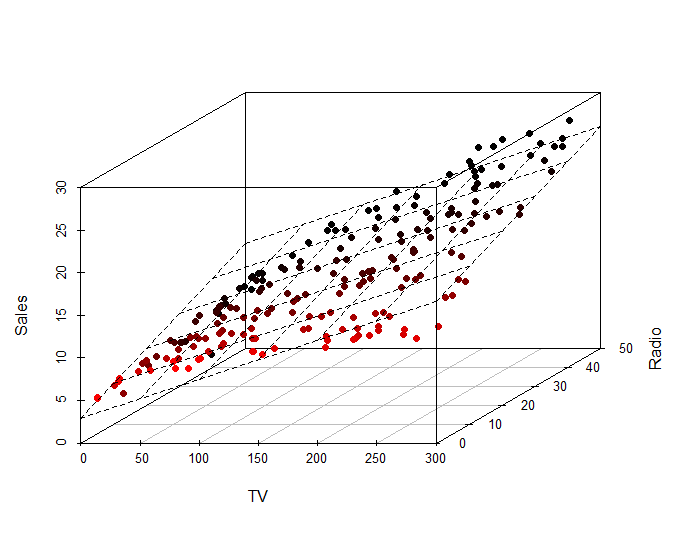
**Figure 1.** Regression model with 2 predictors. The model is a plane; the 3 dimensions represent the 2 predictors ($x_1$, $x_2$) and the response variable ($y$). <br>
<font size = 1>Image courtesy of Stack Overflow (https://stackoverflow.com/)</font>

### Examples

We will investigate several models using a real estate data set with information about several homes.

In [ ]:
#Look at data set
houses <- read.csv("HousingBrief.csv")
head(houses)

We want to predict the sales price of a house using some of the other variables. However, we can only visualize the relationship  between 2 variables at a time. One efficient way to do this is with a **_scatter plot matrix_** as shown below.

In [ ]:
plot(houses)

Because there are so many variables, each plot is quite small.  We can narrow down the columns to include and get a better look at the relationships among columns that seem to have the best potential for visualization. Because they have so few distinct values, we will plot the variables **bedrooms**, **half_baths**, **full_baths**, **total_rooms**, and **garage_spaces** in a separate scatter plot matrix where it is easier to see any possible relationships.  First, we will create the matrix with all the _other_ variables.

Since we want to predict the 2014 price of the home, pay special attention to the plots in the 4th row (where **price2014** is the _**y**_ variable.)

In [ ]:
plot(houses[,c(1,3,4,9:11)])

Now we repeat this for the variables that have "counts" (number of baths, etc.) _making sure to include price_ again, since this is the variable we wish to predict.

In [ ]:
plot(houses[,c(2,5,6:9)])

#### Focus on a single variable

After reviewing the scatter plot matrices, we can focus on any predictor(s) that we like. Below, we start by examining **squarefeet** and **bedrooms** as possible predictors.

In [ ]:
plot(price2014~squarefeet, data=houses)

In [ ]:
plot(price2014~bedrooms, data=houses)

### Simple Models (1 predictor)

To appreciate how multiple regression models work, let's first look at two simple regression models using the above predictors.

In [ ]:
hmodel_1 <- lm(price2014 ~ squarefeet, data=houses)
summary(hmodel_1)

In [ ]:
hmodel_2 <- lm(price2014 ~ bedrooms, data=houses)
summary(hmodel_2)


### Multiple Regression Models 

Both **squarefeet** and **bedrooms** are shown above to have a significant relationship with the price of the house. Below, we use both predictors in the same model, creating a multiple regression model.

In [ ]:
hmodel_3 <- lm(price2014 ~ bedrooms + squarefeet, data=houses)
summary(hmodel_3)

#### Interpreting the Model

**_Holding square footage constant_**, number of bedrooms does not play a significant role in predicting the sales price of the house.  

The only significant predictor in this model is _squarefeet_.  

The model accounts for $\sim 63.6$% of the variability in home price (using adjusted $R^2$). 

#### Interpreting Coefficients

**_Holding number of bedrooms constant_**, each additional square foot of living space increases the predicted price by (0.1602)(1000), or about $160, in this model. (We multiplied by 1000 because the price is given in thousands of dollars.) 

Even though number of bedrooms is not significant, notice that the coefficient is negative. **_Holding square footage constant_**, each additional bedroom **_reduces_** the predicted price by (0.9019)(1000), or about $902, in this model. 

Notice that when **bedrooms** was the only predictor, its coefficient was positive, and now that square footage has been added, the **bedrooms** coefficient is negative. _Think about why this would be the case._

### Models with Other Predictors

In [ ]:
hmodel_4 <- lm(price2014 ~ bikescore, data=houses)
summary(hmodel_4)

In [ ]:
hmodel_5 <- lm(price2014 ~ walkscore, data=houses)
summary(hmodel_5)

In [ ]:
hmodel_6 <- lm(price2014 ~ bikescore+squarefeet, data=houses)
summary(hmodel_6)

### Significance Levels

We recognize that coefficients are significant when there are asterisks next to them, corresponding to low p-values. Also notice that the **_number_** of asterisks corresponds to the **_significance level_**, typically represented by $\alpha$.  The lower the p-value, the stronger the evidence against the null hypothesis.  

A good guideline is:

|Threshold  ($p \lt \alpha$)|Interpretation|
|------------------------:|:--------------|
|$\alpha=0.1$|Weak evidence|
|$\alpha=0.05$|Moderate evidence|
|$\alpha=0.01$|Strong evidence|
|$\alpha=0.001$|Very strong evidence|

Above, we see that the **bikescore** coefficient is significant at $\alpha = 0.01$ (strong) and the **squarefeet** coefficient is significant at $\alpha = 0.001$ (even stronger).

In [ ]:
hmodel_7 <- lm(price2014 ~ walkscore+squarefeet, data=houses)
summary(hmodel_7)

In [ ]:
hmodel_8 <- lm(price2014 ~ bedrooms+total_rooms, data=houses)
summary(hmodel_8)

In [ ]:
hmodel_9 <- lm(price2014 ~ bedrooms+full_baths+half_baths+total_rooms, data=houses)
summary(hmodel_9)

In [ ]:
hmodel_10 <- lm(price2014 ~ bedrooms+full_baths+half_baths+total_rooms+squarefeet, data=houses)
summary(hmodel_10)

#### Interpreting Coefficients

The coefficient of $30.22$ for the _full_baths_ variable can be interpreted as follows:  

**_Holding all other predictors constant_**, for every additional full bath, the predicted sales price increases approximately $30.2K, on average.

The coefficient of $0.11886$ for _squarefeet_ can be scaled to $\frac{11.889}{100}$ and interpreted as follows: 

**_Holding all other predictors constant_**, for every additional 100 square feet, the predicted sales price increases approximately $11.9K, on average.


### Evaluating the Model

The same conditions that we checked in simple linear regression must also be met in multiple regression:
1. **Linearity**: The relationship between the predictors and dependent variable is linear
2. **Normality**: The residuals of all data points ($y_i - \widehat{y}_i$ for each predicted y value) are approximately normally distributed
3. **Homoscedasticity**: The variance of residuals remains the same, regardless of the value being predicted
4. **Independence**: All observations in the sample are independent of each other

We can still test these assumptions by examining diagnostic plots that R generates. Most of what we need to verify can be checked in the **_residual plot_** and the **_normal quantile plot_**.  We will restrict our diagnostics below to those two plots.



In [ ]:
#Display R's default diagnostic plots for our linear model
plot(hmodel_10, which=c(1,2))

#### Observations from the Diagnostic Plots

1. The first plot (residual plot) shows that residuals for lower predicted home prices tend to have smaller magnitude than residuals for higher predicted prices.  This suggests that our homoscedasticity condition is not fully met.
2. The second plot (normal quantile plot) indicates that residuals may not meet the assumption of being normally distributed, especially in the uppermost quantile, and particularly for house 97. 

The conditions are not perfectly met, but the violations are relatively minor (not extreme). There are occasions where an analyst would choose to use this model anyway, but conclusions drawn from the model should be taken with caution.


### One Last Trick

Occasionally, we may wish to generate a model using every column in the data set (other than the response variable) as a predictor. Below is the simplest way to accomplish this in R. Notice that we can simply use the "dot" instead of naming each predictor explicitly.

In [ ]:
hmodel_11 <- lm(price2014 ~ ., data=houses)
summary(hmodel_11)

In [ ]:
plot(hmodel_11)

#### Comprehension Check

1. In this final model with all features as predictors, which predictors emerge as significant?
2. What is the significance level for each significant predictor?
3. What do the diagnostic plots say about the model?  Are there any concerns? If so, what are they?
4. What is the predicted 2014 price for a house with the following characteristics?

|Feature|Value|
|:------|:----:|
|acre | 0.3 |             
|bedrooms | 4 |           
|bikescore |6 |         
|distance  |2.5|        
|garage_spaces |2|     
|full_baths |2|     
|half_baths |1|        
|total_rooms |9|        
|squarefeet  |2850|    
|walkscore   |5|    

5. What is the predicted 2014 price for a 1900 square foot, 3-bedroom, 1.5-bath home with 7 total rooms on a 0.25 acre lot, a 1-car garage, 1.1 miles from the city, with both walk and bike scores of 7?